# Airbnb Exploratory Data Analysis(EDA) And Feature Engineering(FE) By:                                                                                                              Rushikesh Ramteke 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from pandas_profiling import ProfileReport

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
airbnb=pd.read_excel('airbnb prices.xlsx')

In [4]:
!pip install pandas profilling

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement profilling (from versions: none)
ERROR: No matching distribution found for profilling


In [18]:
report=ProfileReport(airbnb,explorative=True)
report.to_file('airbnb_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
airbnb.shape

(18723, 20)

In [6]:
airbnb.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1,NaN,156,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1,NaN,126,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1,NaN,132,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1,NaN,121,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1,NaN,93,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18723 non-null  int64  
 1   survey_id             18723 non-null  int64  
 2   host_id               18723 non-null  int64  
 3   room_type             18723 non-null  object 
 4   country               0 non-null      float64
 5   city                  18723 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          18723 non-null  object 
 8   reviews               18723 non-null  int64  
 9   overall_satisfaction  18723 non-null  float64
 10  accommodates          18723 non-null  int64  
 11  bedrooms              18723 non-null  int64  
 12  bathrooms             0 non-null      float64
 13  price                 18723 non-null  int64  
 14  minstay               0 non-null      float64
 15  name               

In [8]:
airbnb.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.872300e+04,18723.0,1.872300e+04,0.0,0.0,18723.000000,18723.000000,18723.000000,18723.000000,0.0,18723.000000,0.0,18723.000000,18723.000000
mean,1.120568e+07,1476.0,3.577612e+07,NaN,NaN,16.741548,3.301127,2.922021,1.430380,NaN,166.599477,NaN,52.365261,4.888585
std,6.082192e+06,0.0,3.758103e+07,NaN,NaN,33.522630,2.213558,1.327524,0.879019,NaN,108.943849,NaN,0.015142,0.034537
min,2.818000e+03,1476.0,2.234000e+03,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,12.000000,NaN,52.296200,4.763264
25%,6.050608e+06,1476.0,7.140879e+06,NaN,NaN,2.000000,0.000000,2.000000,1.000000,NaN,108.000000,NaN,52.355254,4.864344
50%,1.228287e+07,1476.0,1.988641e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,144.000000,NaN,52.364628,4.885994
75%,1.661084e+07,1476.0,5.202680e+07,NaN,NaN,17.000000,5.000000,4.000000,2.000000,NaN,192.000000,NaN,52.374797,4.907480
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,532.000000,5.000000,17.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.027689


### - Data Cleaning(Handling Missing Values)

<AxesSubplot: >

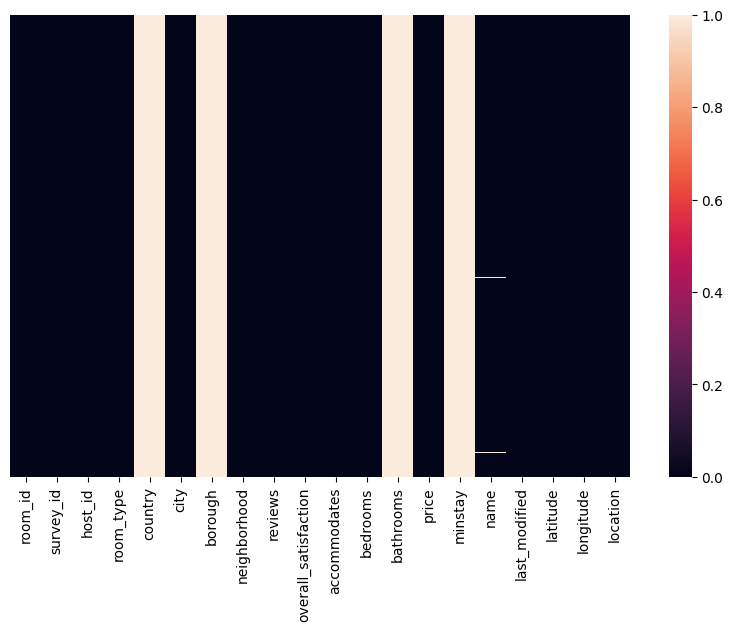

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(airbnb.isnull(),yticklabels=False)

In [10]:
airbnb.isnull().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 18723
city                        0
borough                 18723
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18723
price                       0
minstay                 18723
name                       52
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64

#### In the above output we can clearly see that there are major missing values in the features 1.country, 2.borough, 3.minstay, 4.bathroom, and the feature 'name' also has 52 missing values.

In [11]:
airbnb['country'].fillna(value='Netharland',inplace=True)
airbnb['country'].isnull().sum()

0

In [12]:
airbnb['borough'].fillna(value='centrum',inplace=True)
airbnb['borough'].isnull().sum()

0

In [13]:
airbnb['bathrooms'].fillna(value='1',inplace=True)
airbnb['bathrooms'].isnull().sum()

0

In [14]:
airbnb['minstay'].fillna(value='1 day',inplace=True)
airbnb['minstay'].isnull().sum()

0

In [15]:
airbnb['name'].value_counts()

Amsterdam                                                   36
Lovely apartment near Vondelpark                            10
Magnificent panoramic city view                              8
Beautiful apartment in Amsterdam                             8
Cosy apartment in Amsterdam                                  8
                                                            ..
Bright and trendy apt, sunny balcony -De Pijp, RAI           1
Bright & Cozy Apartment in the Pijp                          1
NEW! Monumental Apartment In The Heart of the City           1
A great apartment in Amsterdamâ€™s vibrant â€˜de Pijpâ€™     1
I have a room available for rent                             1
Name: name, Length: 18150, dtype: int64

In [16]:
airbnb['name'].fillna(value='aparment/shared room/private room',inplace=True)
airbnb['name'].isnull().sum()

0

In [17]:
airbnb.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,Netharland,Amsterdam,centrum,De Pijp / Rivierenbuurt,7,4.5,2,1,1,156,1 day,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,Netharland,Amsterdam,centrum,Centrum West,45,4.5,4,1,1,126,1 day,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,Netharland,Amsterdam,centrum,Watergraafsmeer,1,0.0,3,1,1,132,1 day,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,Netharland,Amsterdam,centrum,Centrum West,7,5.0,4,1,1,121,1 day,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,Netharland,Amsterdam,centrum,De Baarsjes / Oud West,1,0.0,2,1,1,93,1 day,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


#### Above we can see there is no feature left having null values and NaN values

In [18]:
airbnb.apply(lambda x:len(x.unique()))

room_id                 18723
survey_id                   1
host_id                 15943
room_type                   3
country                     1
city                        1
borough                     1
neighborhood               23
reviews                   284
overall_satisfaction        9
accommodates               16
bedrooms                   11
bathrooms                   1
price                     423
minstay                     1
name                    18151
last_modified           18723
latitude                15595
longitude               17157
location                18723
dtype: int64

### - Questions
###  - Who are top earners

### we will find out the top 20 earners on the basis of 'name' as it represents the name of the properties avaliable in the airbnb Netharland

In [19]:
top_earners=airbnb.groupby(['name'])['price'].mean().reset_index().sort_values(by='price',ascending=False)

In [20]:
top_earners=top_earners[0:20]
top_earners

,name,price
17548,"Zonnige woonboot,centraal en rustig",6000.0
12640,One public bedroom,3770.0
1268,AmsterdamBase,1920.0
17317,Welkom in noordzijde,1799.0
16853,"Ultra luxe dreamboat, unforgettable stay promi...",1558.0
10630,Luxurious 3br 110mÂ² houseboat in Amsterdam Ce...,1428.0
17369,Whole house 200m2 Frankendael Park,1412.0
2882,"Bellevue apartment, 2 bedrooms, sleeps 6",1386.0
2476,Beautiful canalhouse for couples near Leidse p...,1343.0
13427,Pure luxe in Amsterdam old south,1319.0


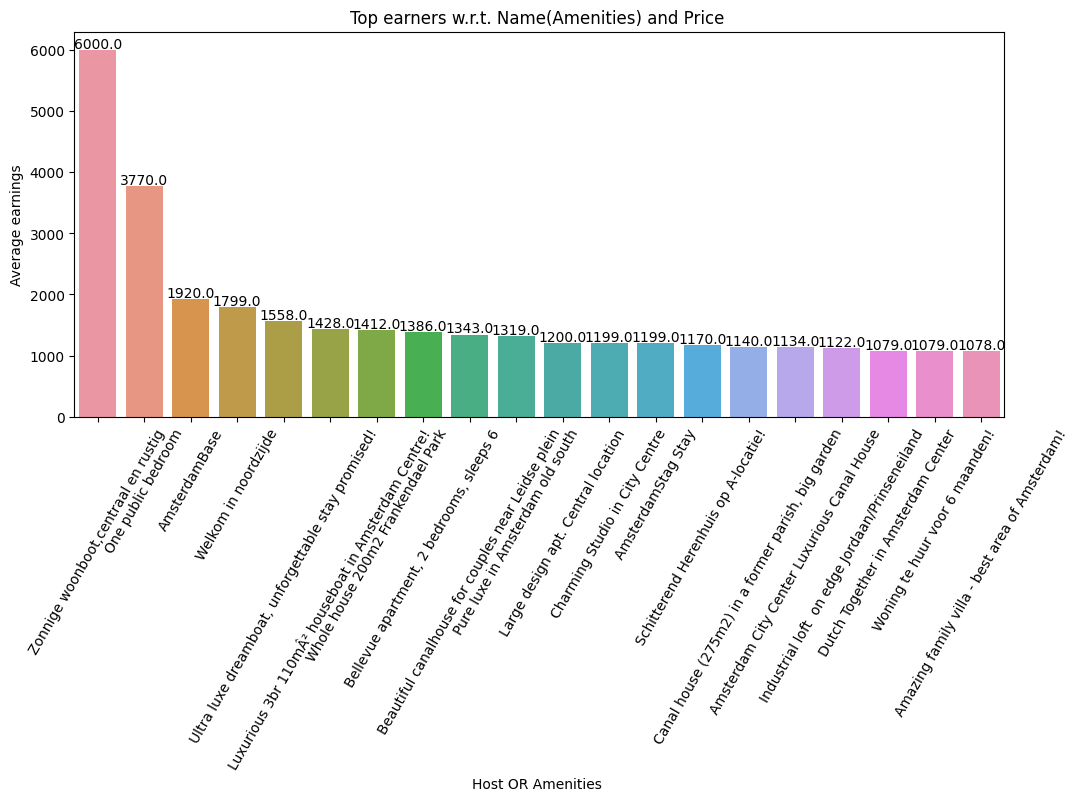

In [21]:
plt.figure(figsize=(12,5))
sns.barplot(x='name',y='price',data=top_earners)

plt.xticks(rotation=60)

for i,data in enumerate(top_earners['price']):
    plt.text(x=i,y=data+29,s=f'{data}',ha='center')
    
plt.title("Top earners w.r.t. Name(Amenities) and Price ")
plt.xlabel("Host OR Amenities ")
plt.ylabel("Average earnings")
plt.show()

#### Conclusion:
#### We can clearly see that top 3 earners are:

##### 'Zonnige woonboot,centraal en rustig' with the highest earning of  $6000


##### 'One public bedroom' with the second highest earning of  $3770

##### 'AmsterdamBase' with the third highest earning of $1920


we can see that the if amenities is of 5 star grade like bunglow,boat-house,resort etc.then the prices are high, where the amenities are of 2 star grade like room,shared room,hostel has a high prices.

### - There is a no feature of monthly earning in dataset so we  are not able to find out any relationship between monthly earning and price 

### - Any particular location getting maximum number of bookings


#### (i) maximum booking w.r.t. neighborhood

In [22]:
maxbook=airbnb['neighborhood'].value_counts().reset_index()[0:10]
maxbook.columns=['neighbor','count']
maxbook


,neighbor,count
0,De Baarsjes / Oud West,3289
1,De Pijp / Rivierenbuurt,2378
2,Centrum West,2225
3,Centrum Oost,1730
4,Westerpark,1430
5,Noord-West / Noord-Midden,1418
6,Oud Oost,1169
7,Bos en Lommer,988
8,Oostelijk Havengebied / Indische Buurt,921
9,Watergraafsmeer,517


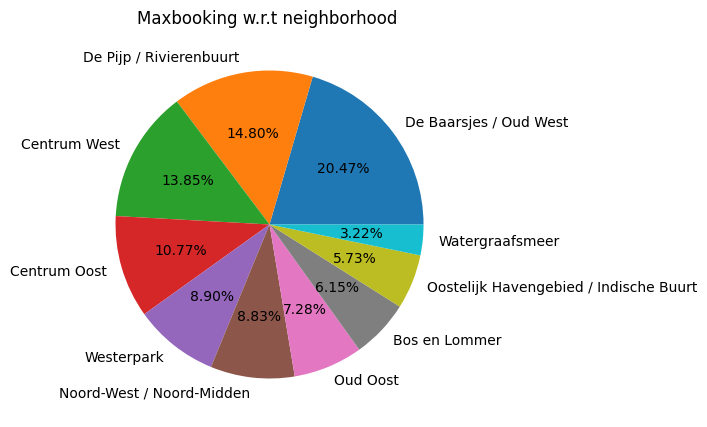

In [23]:
plt.figure(figsize=(5,5))
plt.pie(x='count',labels='neighbor',data=maxbook,autopct='%0.2f%%',startangle=0)
plt.title("Maxbooking w.r.t neighborhood ")
plt.show()

#### Conclusion:
#### 'De Baarsjes / Oud West' place is having a maximum no. of bookings of 20.47% and having a max. count of 3289                             

#### (ii) maximum booking w.r.t. location and reviews

In [24]:
maxbooking=airbnb.groupby(['location'])['reviews'].mean().reset_index().sort_values(by='reviews',ascending=False)
maxbooking=maxbooking[0:10]
maxbooking

,location,reviews
16008,0101000020E6100000DAFE9595268513402C82FFAD642F...,532.0
12477,0101000020E6100000AA46AF06286D134077BB5E9A222E...,465.0
12771,0101000020E6100000AE11C138B8941340AEB8382A372F...,463.0
11555,0101000020E61000009D9FE238F06A1340478D09319730...,452.0
11028,0101000020E6100000965E9B8D959813405DA96741282F...,447.0
14992,0101000020E6100000CCEF3499F19613402DD2C43BC02F...,443.0
13927,0101000020E6100000BE175FB4C78B13407F130A117030...,443.0
5595,0101000020E61000004C6C3EAE0D9513406E6B0BCF4B2F...,433.0
3762,0101000020E610000032CC09DAE480134003EB387EA82E...,430.0
6036,0101000020E6100000529E7939EC6E134006D49B51F32D...,430.0


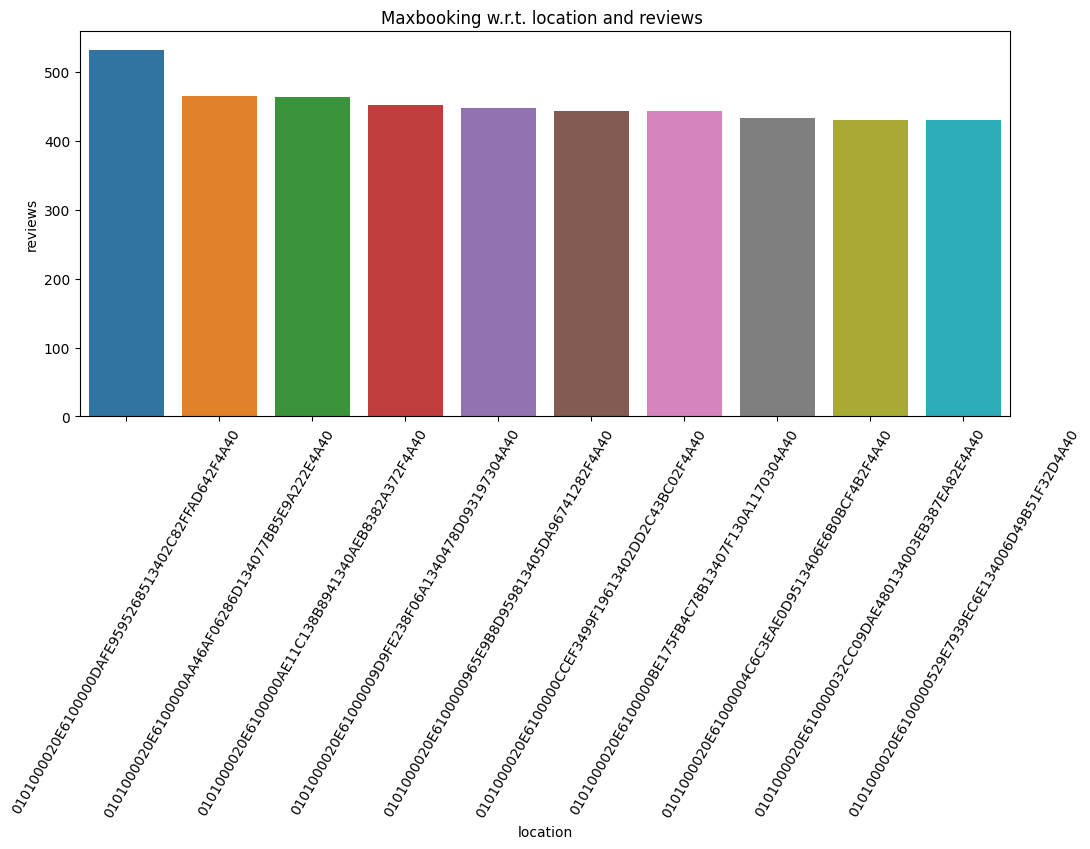

In [25]:
plt.figure(figsize=(12,5))
sns.barplot(x='location',y='reviews',data=maxbooking)

plt.xticks(rotation=60)
plt.title("Maxbooking w.r.t. location and reviews ")
plt.show()

#### chart on the x-axis is not redable so we will try to plot chart by using name feature for better undarstanding

#### (iii) Maximum booking w.r.t. Name and Reviews

In [26]:
maxbooking1=airbnb.groupby(['name'])['reviews'].mean().reset_index().sort_values(by='reviews',ascending=False)
maxbooking1=maxbooking1[0:10]
maxbooking1

,name,reviews
16473,The Backroom - Central private appt,532.0
6197,Cozy Studio 1 - Perfect for Couple!,465.0
13583,Rebel (Private Room),463.0
8916,Independant studio with balcony and WiFi,452.0
1088,Amsterdam Houseboat 'Centre',447.0
13518,Quiet room in Amsterdam Center,443.0
13348,Private room on the Keizersgracht,443.0
17532,Yves Klein - Private Room,433.0
358,"2p. Studio w. pr. Balcony, Bath, Shower & Toilet",430.0
4142,Central location private attic room,430.0


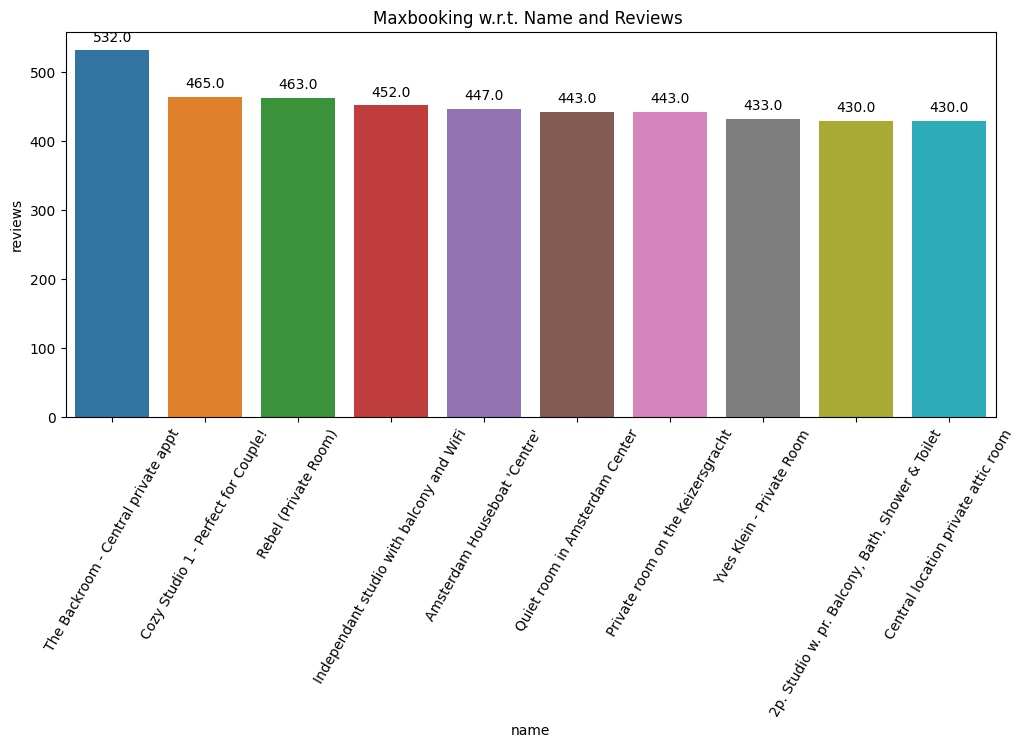

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(x='name',y='reviews',data=maxbooking1)

for i,data in enumerate(maxbooking1['reviews']):
    plt.text(x=i,y=data+29,s=f'{data}',ha='center',va='top')

plt.xticks(rotation=60)
plt.title("Maxbooking w.r.t. Name and Reviews ")
plt.show()

#### Conclusion:
#### This are the top 5 name of property types having maximum bookings
The Backroom - Central private appt	
 Cozy Studio 1 - Perfect for Couple!	
 Rebel (Private Room)	
 Independant studio with balcony and WiFi	
 Amsterdam Houseboat 'Centre'	

### - Price relation with respect to location

In [28]:
price_location=airbnb.groupby(['location'])['price'].mean().reset_index().sort_values(by='price',ascending=False)[0:10]
price_location

,location,price
17300,0101000020E6100000EC884336907E1340F98381E7DE2F...,6000.0
2830,0101000020E6100000261E5036E59A1340266DAAEE912F...,3770.0
17724,0101000020E6100000F2D24D62109813408FDE701FB92F...,1920.0
122,0101000020E610000001DF6DDE3849134027BEDA519C2F...,1799.0
13091,0101000020E6100000B2834A5CC7981340F46F97FDBA2F...,1558.0
9105,0101000020E61000007C98BD6C3B9D13409DBAF2599E2F...,1428.0
4333,0101000020E61000003B8908FF22B81340A5F8F884EC2C...,1412.0
14352,0101000020E6100000C40AB77C24351340B8921D1B8130...,1386.0
16945,0101000020E6100000E7FD7F9C308113407903CC7C072F...,1343.0
9665,0101000020E610000084807C09157C13409C4D4700372D...,1319.0


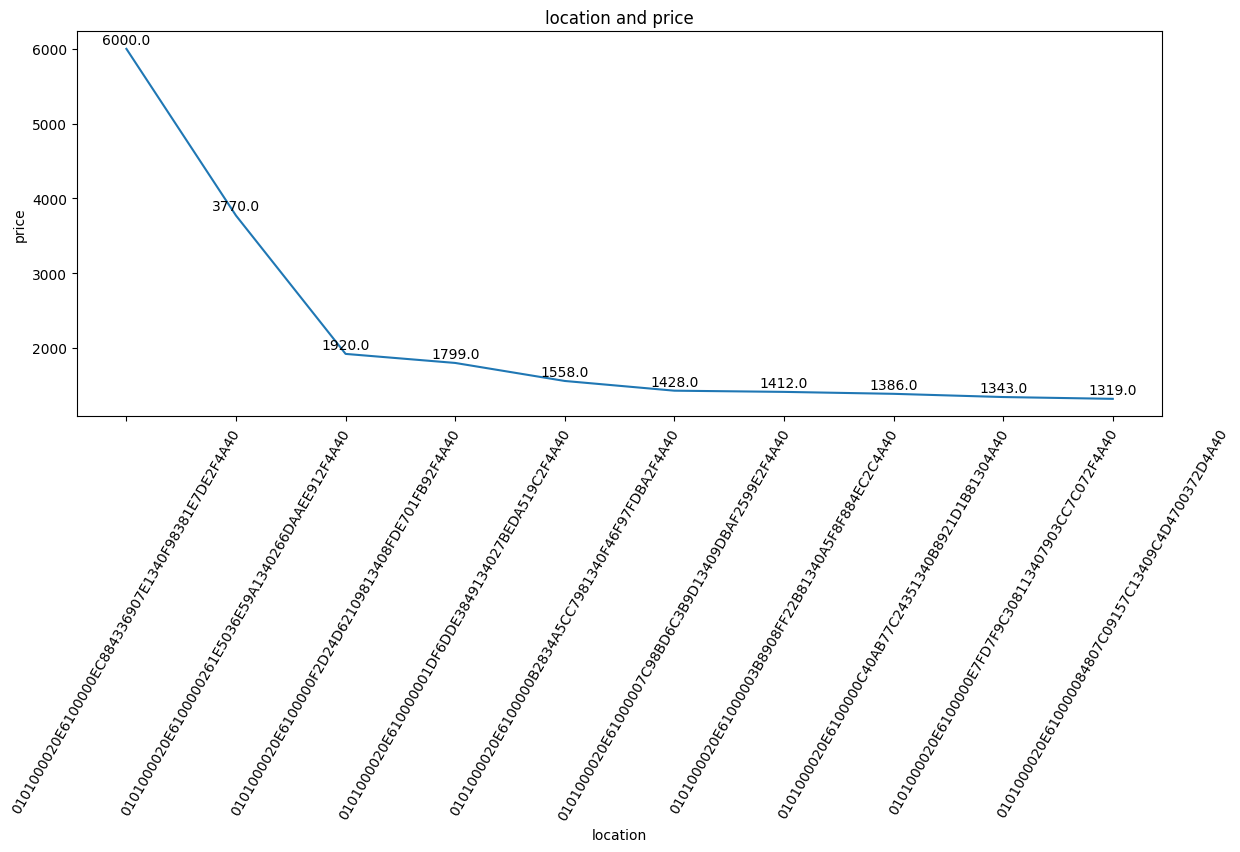

In [29]:
plt.figure(figsize=(14,5))
sns.lineplot(x='location',y='price',data=price_location)
plt.xticks(rotation=60)

for i,data in enumerate(price_location['price']):
    plt.text(x=i,y=data+29,s=f'{data}',ha='center',va='bottom')

plt.title('location and price')
plt.show()

### - Neighborhood  vs price

In [43]:
price_neighbor=airbnb.groupby(['neighborhood'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
price_neighbor=price_neighbor.round(decimals=2)
price_neighbor

,neighborhood,price
5,Centrum West,208.31
4,Centrum Oost,201.22
14,Noord-West / Noord-Midden,182.73
11,Ijburg / Eiland Zeeburg,175.88
8,De Pijp / Rivierenbuurt,168.34
21,Westerpark,163.76
7,De Baarsjes / Oud West,159.01
17,Oud Noord,156.98
20,Watergraafsmeer,154.67
18,Oud Oost,151.61


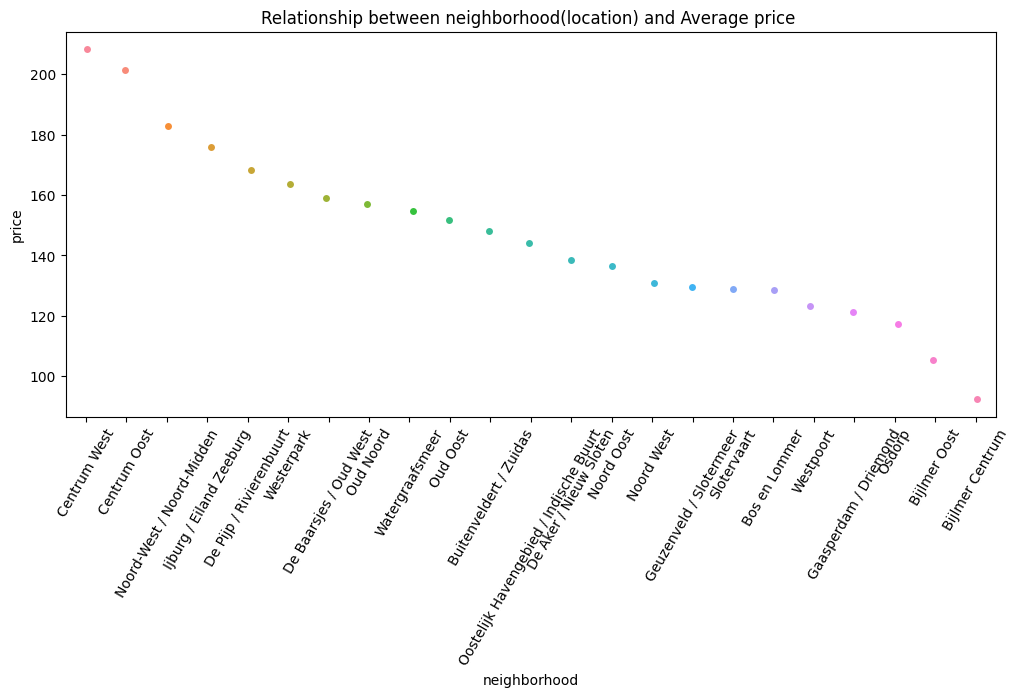

In [55]:
plt.figure(figsize=(12,5))
sns.stripplot(x='neighborhood',y='price',data=price_neighbor)
plt.xticks(rotation=60)

plt.title("Relationship between neighborhood(location) and Average price ")
plt.show()

#### Conclusion:
#### Centrum West has a highest average price 208.31

#### Centrum Oost has a 2nd highest average price 201.22

#### Noord-West / Noord-Midden has a 3rd highest average price 182.73

In [41]:
price_neighbor_scatter=airbnb[['neighborhood','price']].sort_values(by='price',ascending=False)
price_neighbor_scatter

,neighborhood,price
178,Westerpark,6000
180,Centrum Oost,3770
181,Centrum West,1920
179,Geuzenveld / Slotermeer,1799
182,Centrum West,1558
...,...,...
18704,Bos en Lommer,23
14749,Bijlmer Centrum,22
18705,De Pijp / Rivierenbuurt,21
25,Slotervaart,18


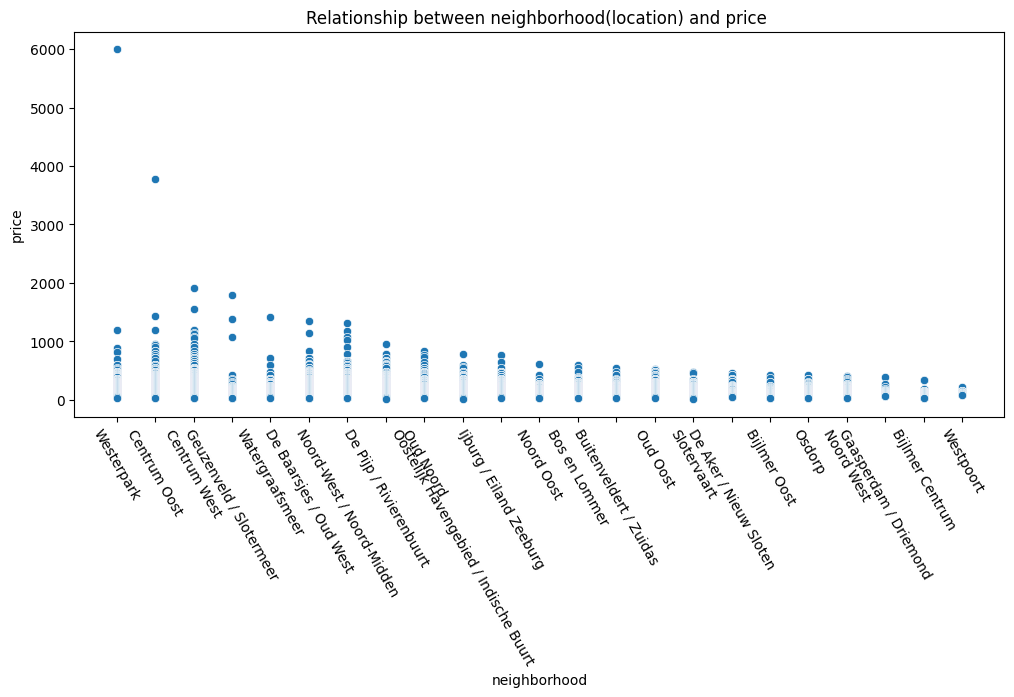

In [54]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='neighborhood',y='price',data=price_neighbor_scatter)
plt.xticks(rotation=300)

plt.title("Relationship between neighborhood(location) and price ")
plt.show()

#### Conclusion:
#### Prime locations at Amsterdam having highest rates as compare to other locations.

### - Relationship between Quality and Price

#### In a dataset we don't have quality feature, so we will consider a quality as a overall_satisfaction rating given by the customers. Now we can say relationship between overall_satisfaction	and price.	

In [32]:
price_quality=airbnb.groupby(['price'])['overall_satisfaction'].mean().reset_index().sort_values(by='overall_satisfaction',ascending=True)
price_quality=price_quality[0:]
price_quality

,price,overall_satisfaction
422,6000,0.0
309,406,0.0
310,407,0.0
313,410,0.0
322,427,0.0
...,...,...
255,313,5.0
387,721,5.0
388,737,5.0
333,449,5.0


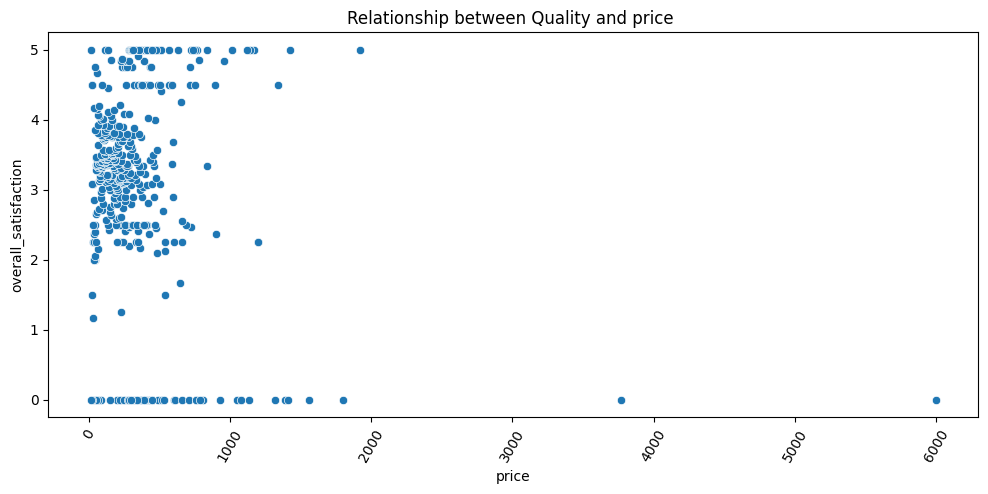

In [33]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='price',y='overall_satisfaction',data=price_quality)
plt.xticks(rotation=60)
plt.title("Relationship between Quality and price ")
plt.show()

#### Conclusion:
#### In the above scatterplot plot we can see that if the 'price' is higher than the 'overall_satisfaction(quality)' is less and where the 'price' is less than the 'overall_satisfaction(quality)' is high. For example: price=313 then the overaoverall_satisfaction(quality) is 5.0 and in other side price=6000 then the overall_satisfaction(quality) is 0.0

In [34]:
airbnb.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,Netharland,Amsterdam,centrum,De Pijp / Rivierenbuurt,7,4.5,2,1,1,156,1 day,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,Netharland,Amsterdam,centrum,Centrum West,45,4.5,4,1,1,126,1 day,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,Netharland,Amsterdam,centrum,Watergraafsmeer,1,0.0,3,1,1,132,1 day,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,Netharland,Amsterdam,centrum,Centrum West,7,5.0,4,1,1,121,1 day,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,Netharland,Amsterdam,centrum,De Baarsjes / Oud West,1,0.0,2,1,1,93,1 day,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


### - Price comparison with respect to the location and room type

In [48]:
room_neighborhood=airbnb.groupby(['room_type','neighborhood'])['price'].agg('mean').reset_index().sort_values( by='price',ascending=False)[0:60]
room_neighborhood=room_neighborhood.round(decimals=2)
room_neighborhood

,room_type,neighborhood,price
5,Entire home/apt,Centrum West,228.97
4,Entire home/apt,Centrum Oost,219.72
11,Entire home/apt,Ijburg / Eiland Zeeburg,201.30
14,Entire home/apt,Noord-West / Noord-Midden,197.61
8,Entire home/apt,De Pijp / Rivierenbuurt,178.94
10,Entire home/apt,Geuzenveld / Slotermeer,176.34
6,Entire home/apt,De Aker / Nieuw Sloten,174.09
21,Entire home/apt,Westerpark,173.79
17,Entire home/apt,Oud Noord,173.06
7,Entire home/apt,De Baarsjes / Oud West,170.99


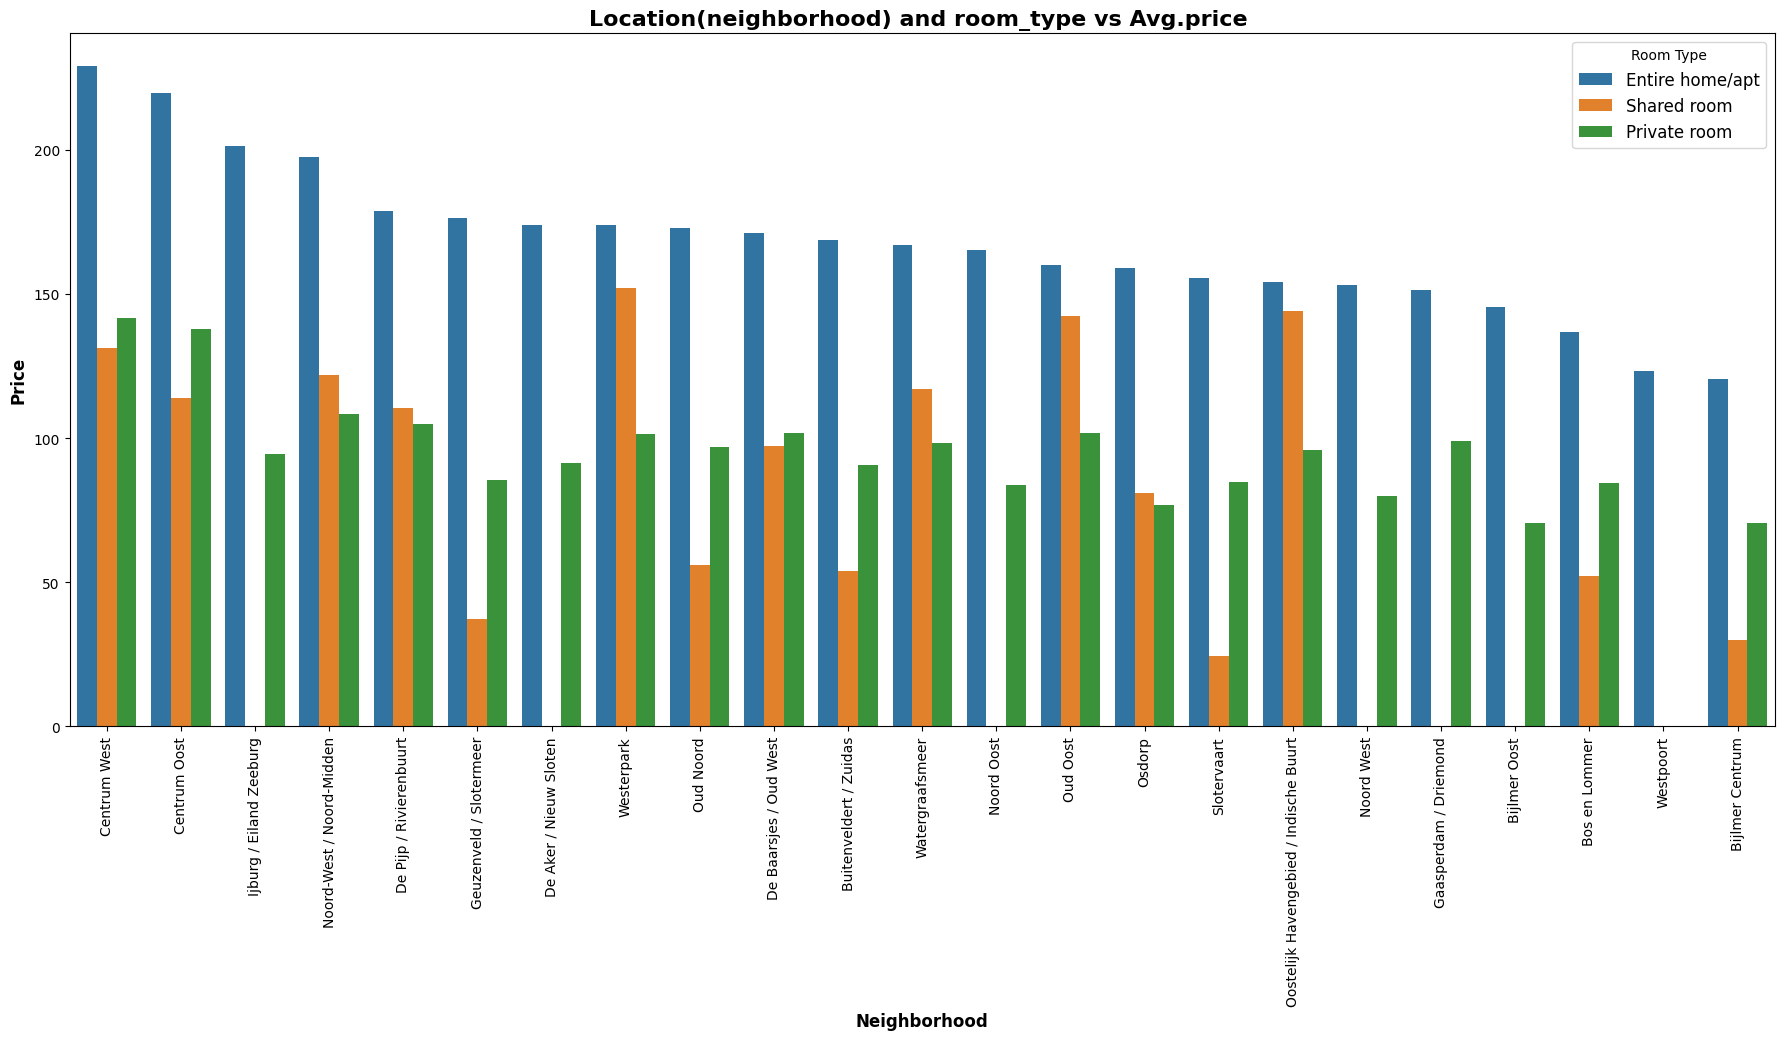

In [45]:
plt.figure(figsize=(22,9))
sns.barplot(x='neighborhood',y='price',data=room_neighborhood,hue='room_type')
plt.xticks(rotation=90)
plt.title("Location(neighborhood) and room_type vs Avg.price ",fontweight='bold',fontsize=16)
plt.xlabel('Neighborhood',fontsize=12,fontweight='bold')
plt.ylabel('Price',fontsize=12,fontweight='bold')
plt.legend(title='Room Type',fontsize=12,loc='upper right')
plt.show()

#### Conclusion:
#### From the above barplot we can see that 'Entire home/apt' room type at a 'Centrum West' has a highest price 228.97 and the 'Shared room' at the 'Slotervaar' has a lowest price 24.33 and also the location 'Centrum West' has a highes average price for all the three room types.

### - Preference of the guests for Room Type 

In [37]:
room_count=airbnb['room_type'].value_counts().reset_index()
room_count.columns=['room type','count']
room_count

,room type,count
0,Entire home/apt,14978
1,Private room,3682
2,Shared room,63


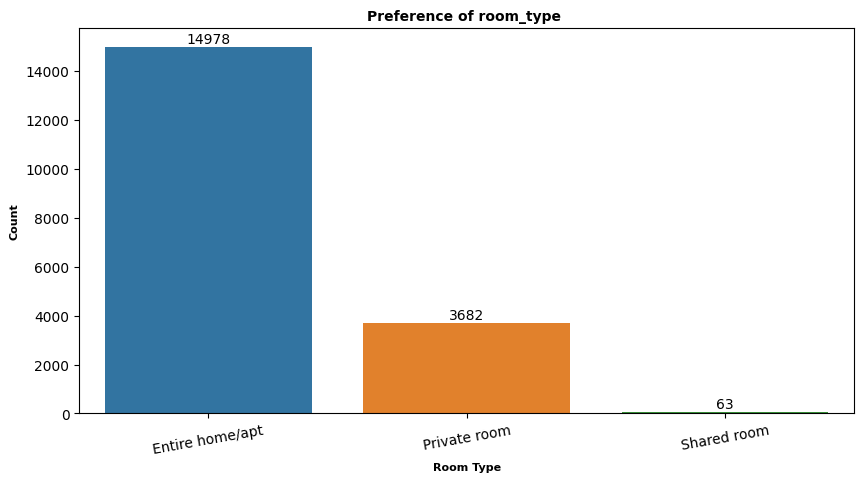

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x='room type',y='count',data=room_count)
plt.xticks(rotation=10)
plt.title("Preference of room_type ",fontweight='bold',fontsize=10)
plt.xlabel('Room Type',fontsize=8,fontweight='bold')
plt.ylabel('Count',fontsize=8,fontweight='bold')
for i,data in enumerate(room_count['count']):
    plt.text(x=i,y=data+29,s=f'{data}',ha='center',va='bottom')

#### Conclusion:
#### From the above visualization we can clearly see that the most prefered room type by the guests is Entire home/apt and the less prefered room type is shared room and private room.

### - Cheapest Airbnb property in  Amsterdam

In [50]:
cheap_airbnb=airbnb.groupby(['name'])['price'].mean().reset_index().sort_values(by='price',ascending=True)
cheap_airbnb=cheap_airbnb[0:20]
cheap_airbnb

,name,price
14119,"SORRY, NO TOURISTS ALLOWED - Kattenoppas gezocht",12.0
13605,Relax 9 hours!,18.0
12496,Nice room in de Pijp,21.0
6196,Cozy Studio,22.0
11144,Minimalist White Room,23.0
4575,Cheap and cosy room Amsterdam,24.0
13704,"Rent a Tent, Cheap and Fun stay in Amsterdam!",24.0
8591,Historic Dutch Barge - 1870s Built - Sleeps 4,24.0
13895,Room Overtoom Amsterdam Centre,24.0
118,1 room next to Ziggo Dome,24.0


Text(0.5, 1.0, 'Cheapast Airbnb property ')

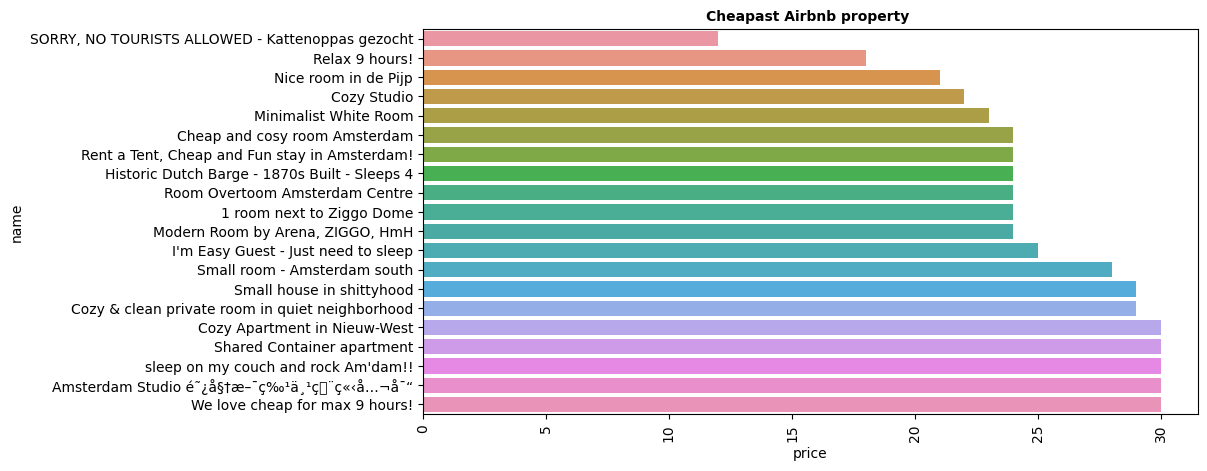

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(x='price',y='name',data=cheap_airbnb)
plt.xticks(rotation=90)
plt.title("Cheapast Airbnb property ",fontweight='bold',fontsize=10)

#### Conclusion:
#### From the above barchart we see 20 cheapest propertys in which the 'Kattenoppas gezocht' is the cheapest property with the price of $12

### - Expensive Airbnb property in  Amsterdam

In [40]:
expe_airbnb=airbnb.groupby(['name'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
expe_airbnb=expe_airbnb[0:20]
expe_airbnb

,name,price
17548,"Zonnige woonboot,centraal en rustig",6000.0
12640,One public bedroom,3770.0
1268,AmsterdamBase,1920.0
17317,Welkom in noordzijde,1799.0
16853,"Ultra luxe dreamboat, unforgettable stay promi...",1558.0
10630,Luxurious 3br 110mÂ² houseboat in Amsterdam Ce...,1428.0
17369,Whole house 200m2 Frankendael Park,1412.0
2882,"Bellevue apartment, 2 bedrooms, sleeps 6",1386.0
2476,Beautiful canalhouse for couples near Leidse p...,1343.0
13427,Pure luxe in Amsterdam old south,1319.0


Text(0.5, 1.0, 'Expensive Airbnb property ')

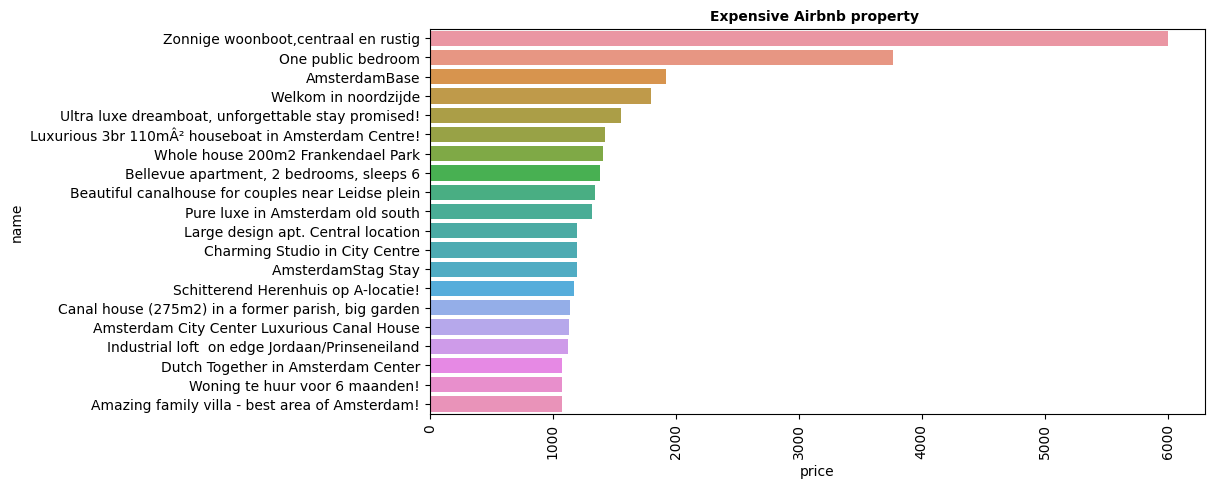

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(x='price',y='name',data=expe_airbnb)
plt.xticks(rotation=90)
plt.title("Expensive Airbnb property ",fontweight='bold',fontsize=10)

#### Conclusion:
#### From the above barchart we see 20 expensive propertys in which the 'Zonnige woonboot,centraal en rustig' is the expensive property with the price of $6000